In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
## --- 설정 변수 정의 ---
## 이미지 경로 설정
# 입력 이미지 경로 (npy 파일)
img_path_list = "/src/hyebin/deeplab_v3/train_data_256.npy"

## 잘라낼 위치, 크기 설정
# 가로 시작점
step_x = 50
# 세로 시작점
step_y = 50
# 가로 범위
width = 200
# 세로 범위
height = 200

In [3]:
## --- 이미지 출력 함수 ---
def show_image(pil_img, crop_img):
    
    # pyplot의 현재 전체 이미지 크기를 백업 후 설정함
    tmp_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (10, 4)  # 너비, 높이 (in)

    # 원본 이미지 출력
    plt.subplot(1, 2, 1)
    plt.imshow(pil_img, cmap='gray')

    # 크롭 이미지 출력
    plt.subplot(1, 2, 2)
    plt.imshow(crop_img, cmap='gray')

    plt.show()
    plt.close()

    # 백업된 pyplot 이미지 크기를 복원함
    plt.rcParams["figure.figsize"] = tmp_size

In [4]:
## --- 이미지 크롭 및 저장 함수 ---
def crop_image(img, step_x, step_y, width, height):
    
    # [y:h, x:w]
    # [높이(행), 너비(열)]
    # [세로 시작점:세로 범위, 가로 시작점:가로 범위]
    crop_img = img[step_y:height, step_x:width]
    
    return crop_img

In [5]:
## --- numpy 이미지 배열 가져오기 ---
img_list = np.load(img_path_list, allow_pickle=True)
img_list= np.squeeze(img_list, axis=3)  # (537,256,256,1) → (537,256,256)
print(img_list.shape)

(537, 256, 256)


In [6]:
## --- 가져온 이미지 배열을 리스트에 담기 ---
start = 100  # 시작 이미지
num = 10    # 출력 개수
_img = []

for i in range(num):
    _img.append(img_list[start+i])

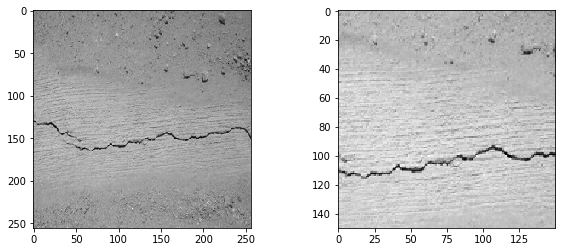

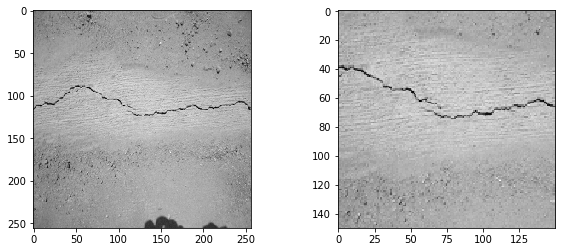

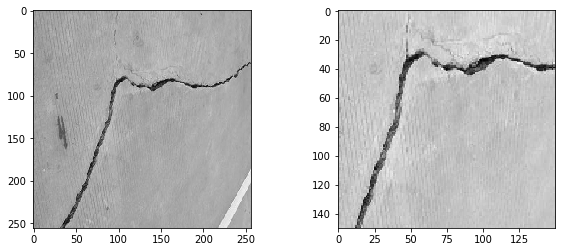

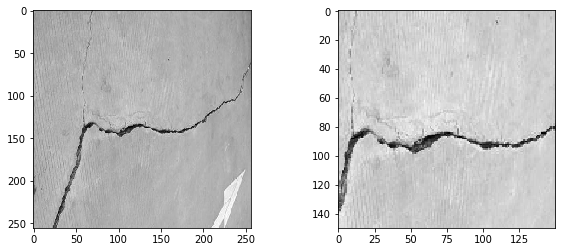

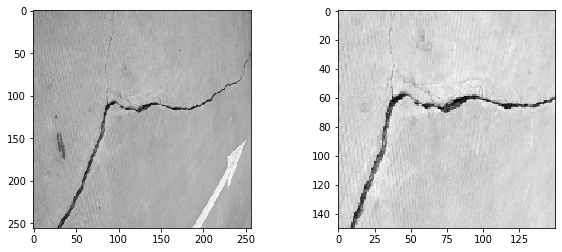

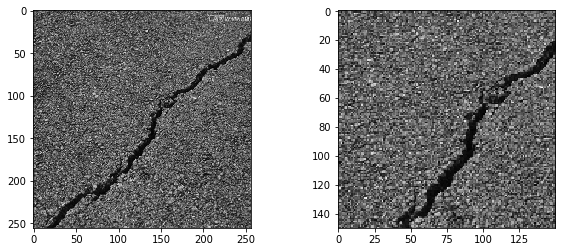

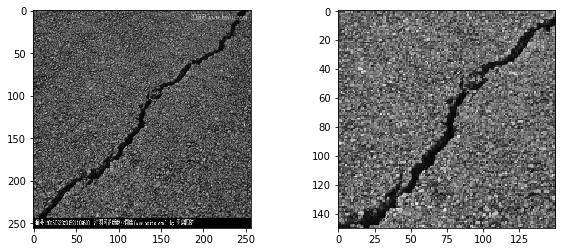

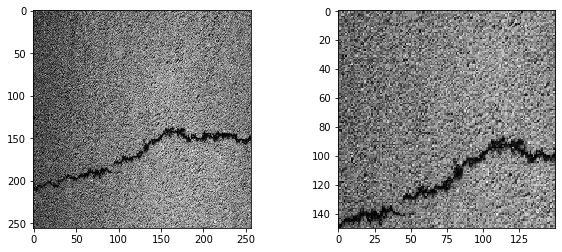

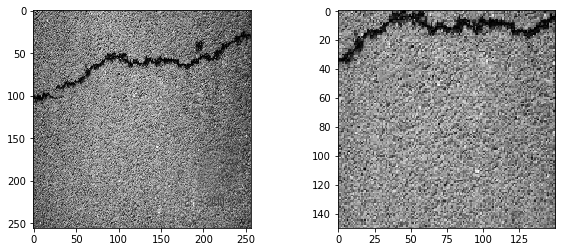

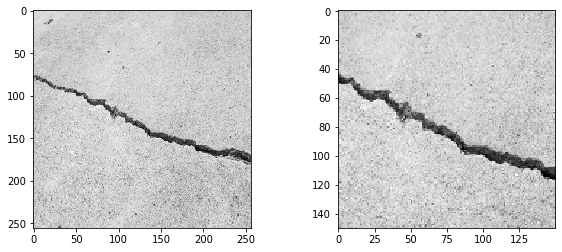

In [7]:
## --- 실행 ---
for i in range(len(_img)):
    # [y:h, x:w]
    # [높이(행), 너비(열)]
    # [세로 시작점:세로 범위, 가로 시작점:가로 범위]
    crop_img = crop_image(_img[i], step_x, step_y, width, height)
    show_image(_img[i], crop_img)